<a href="https://colab.research.google.com/github/shreyashganvir77/Learn.MachineLearning.python/blob/main/UpperConfidenceBound(Reinforcement_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Librabries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the Dataset.

In [4]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

Implementing UCB.

In [5]:
# The Reinforcement Learning is some what similar to control system feeback loop.
# Here, there is an agent which performs certain task on the enviorment and for that task agent may or may not recive the reward. 
# If there is reward in feedback then the agent learns from that reward and updated it's accuracy. 
# Here the problem set deals is similar to Multi-Armed Bandit problem. Similar to Multi-Armed Bandit here we have no of ads selection by the user.
# There are 10 different ads displayed on the web page and we have a data weather user selected ad as 1 and no selection is 0.
# There are total 1000 Rounds for this purpose, later we can analyze the minimum number of rounds required to reach the conclusion(here, the distibution of selection)
# The MUlti-Armed Bandit problem deals the exploaration and exploitaion of the machine and this is carried for 10000 rounds.
# The mathematical approach for this problem can be seen below.

# The UCB approach on the Multi-Armed Bandit problem is deterministic and reuires a update on every round.

import math

N = 10000
d = 10
ads_selected = []
number_of_selection = [0] * d
sum_of_rewards = [0] * d
total_reward = 0

for n in range (0, N):
  ad = 0
  max_upper_bound = 0
  for i in range (0, d):
    if (number_of_selection[i] > 0):  
      avg_reward = sum_of_rewards[i]/number_of_selection[i]
      delta_i = math.sqrt(3/2 * math.log(n+1)/number_of_selection[i]) 
      upper_bound = delta_i + avg_reward
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i  
  ads_selected.append(ad)
  number_of_selection[ad] += 1
  reward = dataset.values[n, ad] 
  sum_of_rewards[ad] += reward
  total_reward += reward


Visualizing the Results.

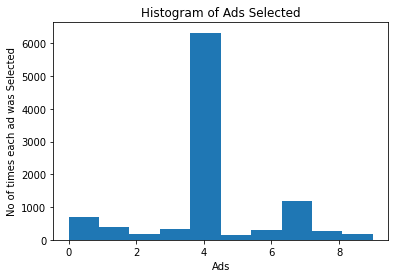

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selected')
plt.xlabel('Ads')
plt.ylabel('No of times each ad was Selected')
plt.show()